# Plot Connectomes

In [82]:
import nilearn.plotting as nip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as  cm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import sklearn.cluster as skc
import scipy.cluster.hierarchy as cluster

## Load the Power 2011 classification

All of the connectomes in this analysis were extacted from the Power 2011 classification. We will start by first loading the corresponding data table.

In [3]:
power2011 = pd.read_csv("../rsfmri/bin/power_2011.csv")
power2011 = power2011.iloc[:,0:7]
power2011

,ROI,X,Y,Z,Network,Color,NetworkName
0,1,-25,-98,-12,-1,White,Uncertain
1,2,27,-97,-13,-1,White,Uncertain
2,3,24,32,-18,-1,White,Uncertain
3,4,-56,-45,-24,-1,White,Uncertain
4,5,8,41,-24,-1,White,Uncertain
...,...,...,...,...,...,...,...
259,260,-27,-71,37,12,Green,Dorsal attention
260,261,-32,-1,54,12,Green,Dorsal attention
261,262,-42,-60,-9,12,Green,Dorsal attention
262,263,-17,-59,64,12,Green,Dorsal attention


### Visualize the connectome matrix

We can visualize the connectome matrix for the 62 participants.

In [4]:
R = np.zeros((264, 264, 61))
PR = np.zeros((264, 264, 61))

index = 0
for ii in range(1, 63):
    subj = "sub-%03d" % (ii,)
    if ii != 8:
        R[:,:,index]=np.loadtxt("../rsfmri/%s/R_py.txt" % (subj,))
        PR[:,:,index]=np.loadtxt("../rsfmri/%s/PR_py.txt" % (subj,))
        index += 1


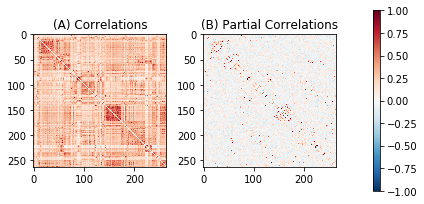

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3), gridspec_kw={'width_ratios': [20, 20, 1]})
mR = np.mean(R, 2)
mPR = np.mean(PR, 2)

for ii in range(264):
    mR[ii,ii] = 0
    mPR[ii,ii] = 0

im = axs[0].imshow(mR, vmin=-1, vmax=1, cmap="RdBu_r")
axs[0].set_title("(A) Correlations")
fig.colorbar(im, cax=axs[2])
axs[1].imshow(mPR, vmin=-0.25, vmax=0.25, cmap="RdBu_r")
axs[1].set_title("(B) Partial Correlations")
#axs[2].set_visible(False)
plt.tight_layout()
plt.savefig("connectomes.png")

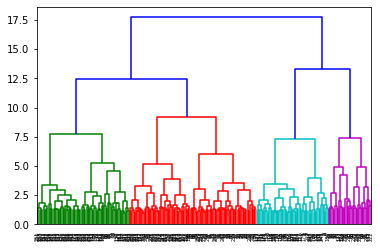

In [72]:
clust = cluster.linkage(mR, method='ward')
res = cluster.dendrogram(clust)

In [80]:
cluster.fcluster(Z=clust, t=5, criterion='maxclust')

array([1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 5, 3, 2, 5, 3,
       3, 3, 3, 3, 3, 3, 5, 2, 3, 3, 5, 2, 5, 2, 2, 2, 5, 3, 3, 5, 3, 3,
       3, 3, 3, 3, 3, 3, 5, 1, 4, 4, 5, 4, 1, 1, 4, 4, 4, 4, 4, 1, 1, 5,
       1, 5, 5, 5, 1, 1, 5, 1, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 1, 4, 4, 1, 1, 4,
       5, 1, 1, 1, 4, 4, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 4, 1, 4, 4, 4, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 4,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 5, 2, 5, 3, 3, 3, 3, 3, 3, 2, 2,
       1, 1, 1, 4, 4, 4, 4, 4, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3],
      dtype=int32)

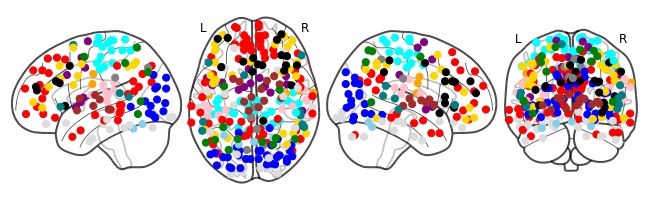

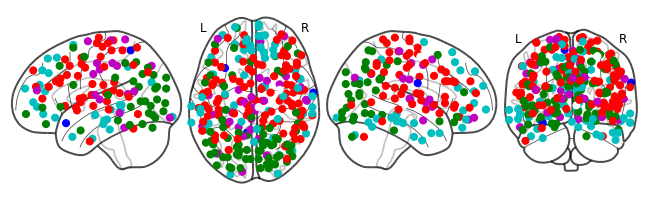

In [88]:
pc = np.zeros((264, 264))

pcol = [x.lower() for x in list(power2011['Color'])]

colordict = dict(zip(res['leaves'], res['color_list']))

def colortranslate(x):
    if x.lower() == "yellow":
        return "gold"
    elif x.lower() == "pale blue":
        return "skyblue"
    elif x.lower() == "white":
        return "gainsboro"
    else:
        return x
    
pcol = [colortranslate(x) for x in pcol]
xyz = []
for roi in list(power2011['ROI']):
    entry = power2011.loc[power2011['ROI'] == roi]
    x = int(entry['X'])
    y = int(entry['Y'])
    z = int(entry['Z'])
    xyz.append((x,y,z))
pcoords = np.array(xyz)

def cluster_color(roi, dictionary):
    if roi in dictionary:
        return dictionary[roi] 
    else:
        return 'white'

clust_col = [cluster_color(roi, colordict) for roi in list(power2011['ROI'])]

power_img = nip.plot_connectome(pc, pcoords, node_color=pcol, display_mode='lzry')

clust_img = nip.plot_connectome(pc, pcoords, node_color=clust_col, display_mode='lzry')
plt.savefig("figures/four_components.png", figsize=(7, 5))

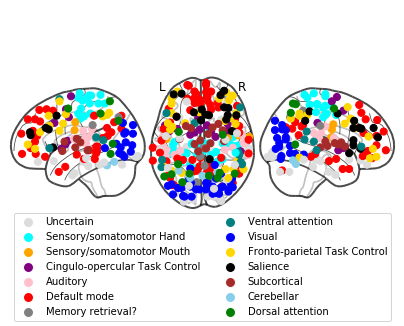

In [87]:
fig, axs = plt.subplots(1,1, figsize=(7,5))
nip.plot_connectome(pc, pcoords, node_color=pcol, display_mode='lzr', axes=axs)

allkols=list(power2011['Color'])
allnets=list(power2011['NetworkName'])

kols=[]
nets=[]
for i in range(len(allkols)):
    if not allkols[i] in kols:
        kols.append(allkols[i])
        nets.append(allnets[i])

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in [colortranslate(x) for x in kols]]

fig.legend(handles, nets, loc="lower center", ncol=2)
plt.savefig("figures/power2011.png", figsize=(7, 5))
plt.show()

In [59]:
7 in colordict

True